In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import uszipcode
from __future__ import print_function
from uszipcode import SearchEngine
from collections import Counter
import mpld3 
mpld3.enable_notebook()
import matplotlib.pyplot as plt
search = SearchEngine()
import os
import math
plt.rcParams["figure.figsize"] = (16,10)


os.chdir("/Users/mirbek/Desktop/Data Science/ubiqum/projects/DS5/Task1")
print(os.listdir("/Users/mirbek/Desktop/Data Science/ubiqum/projects/DS5/Task1"))

['.DS_Store', 'SBAnational.csv', 'Should This Loan be Approved or Denied A Large Dataset with Class Assignment Guidelines.pdf', 'credit_clean.csv']


In [2]:
%config IPCompleter.greedy=True

In [3]:
credit = pd.read_csv('SBAnational.csv', header ='infer')

/Users/mirbek/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#Quick overview of our Dataset and observing the types of variables
credit.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [5]:
#Deleting duplicates if any
credit = credit.drop_duplicates(keep = 'first')
#Shape of the data 899164 rows and 27 columns
credit.shape

(899164, 27)

In [6]:
#All features we have
print(credit.dtypes.index)

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')


In [7]:
#Summary of data frame (count, mean, standart deviation, min, quartiles, max)
credit.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312759,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [8]:
#NA observation. Lot of NAs :(
credit.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [9]:
#Our target Value is to predict MIS_Value according to the documenation MIS_Status has 2 variables: 
#Loan status charged off = CHGOFF, Paid in full = PIF
Counter(credit.MIS_Status).keys() # We have: "PIF", CHGOFF, nan in this column

dict_keys(['P I F', 'CHGOFF', nan])

In [10]:
Counter(credit.MIS_Status).values() # "PIF": 739609, CHGOFF: 157558, nan:1997
#Pretty imbalanced. We will try not to loose our rows with CHGOFF values while we are cleaning our dataset.

dict_values([739609, 157558, 1997])

In [11]:
                                                    #####FIRST Dealing with NAs.##### 
                                                          #Name, City and State
# There 4 columns belongs to Borrower information: Name, City, State and Zip.
#Name is unique and useless and we can drop entire column.
credit = credit.drop(axis =1, columns = ['Name'])
#Next City and State. As you can see there are no NAs in Zip, so we can easily impute City and State uzing Zip values
#Creating condition to our loop
cond = (credit.City.isnull()|credit.State.isnull())
missing_rows = credit[cond].index
#I will go through loop and using Index number of missing rows, I will impute City and State using zearch.by_zipcode function
for i in missing_rows:
    zipcode = search.by_zipcode(credit.iloc[i,3]) # 3 is corresponds to Zip code
    credit.iloc[i,1] = zipcode.major_city # 1 -> City
    credit.iloc[i,2] = zipcode.state # 2 -> State
#Check how our NA's was imputed. We still have 4 NAs. I have looke through of them. One zipcode = 0 
#and other 3 are not in list the of search.by_zipcode function. I think we can delete this rows.
credit.isnull().sum()

LoanNr_ChkDgt             0
City                      4
State                     4
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [12]:
#Next features with lot of NA's are Bank and BankState. 
#I would like to check if State of borrower = State of Bank. 
#If so we can just delete one of them.
equal = 0
non_equal = 0
for i in credit.index:
    if credit.State[i] == credit.BankState[i]:
        equal = equal + 1
    else:
        non_equal = non_equal +1
print(equal, non_equal)
# Sad. As you can see below it's not correct assumption 473949 cases are equal and 425215 are not.

473949 425215


In [13]:
#Since our goal is to define default case or not, we will check are there default cases in rows where we don't know
#the Bank Name and Bank State. 
cond_1 = credit.Bank.isnull()|credit.BankState.isnull()
missing_rows_1 = credit[cond_1].index
yes = 0
no = 0
for i in missing_rows_1:
    if credit.MIS_Status[i] == 'CHGOFF':
        yes = yes+1
    else:
        no = no +1
print(yes,no)
#Not bad, 72 cases against 1494. I'm not still sure do we need columns with State of the Bank and Bank name according.
#We can delete 1494 rows with not default cases, since we have already imbalanced data. We will see.

72 1494


In [14]:
#Feature - 'ChgOffDate' corresponds to the date when a loan was declared to be in default. 
#I made little investigation about ChgOffDate feature we have 739609 paid cases and we have 736465 NA's in this feature 
#seems like if credit paid there is NA in this featue. default date = default case.
#So we will just drop this feature.
credit = credit.drop(axis =1, columns = ['ChgOffDate'])

In [15]:
#Next I want to celan my dependent variable - MIS_Status drop NA's and change dtype from object to ineteger.
#1 - grant a loan (low risk of default), 0 - not grant a loan (high risk of default)
#And of course drop 4 rows in City and State column with NAs
credit = credit.dropna(axis =0, subset=['City','State','MIS_Status'])

loan_status = {'P I F': 1,'CHGOFF': 0} 
credit.MIS_Status = [loan_status[item] for item in credit.MIS_Status] 

Counter(credit.MIS_Status).keys() # unique values now we have only 1 and 0 in column MIS_Status

dict_keys([1, 0])

In [16]:
Counter(credit.MIS_Status).values() # count values 739607 = "1" against 157556 = "0"

dict_values([739607, 157556])

In [17]:
#According to the documentation we have 5 columns with Currency values. I want to change all of them to the float.
#It will be helpful for visualization and see the corealation of currency to our target value.
currency = [19,20,22,23,24] #Column numbers we need to convert float.
for i in currency:
    credit[credit.columns[i]] = credit[credit.columns[i]].replace('[\$,]', '', regex=True).astype(float) 

In [18]:
#Looks good.
credit.isnull().sum()

LoanNr_ChkDgt           0
City                    0
State                   0
Zip                     0
Bank                 1505
BankState            1512
NAICS                   0
ApprovalDate            0
ApprovalFY              0
Term                    0
NoEmp                   0
NewExist              134
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4520
LowDoc               2578
DisbursementDate     2175
DisbursementGross       0
BalanceGross            0
MIS_Status              0
ChgOffPrinGr            0
GrAppv                  0
SBA_Appv                0
dtype: int64

In [19]:
#Next feature is New Exist. According to the documentation
#1 = Existing business, 2 = New businesswe 
#And at this moment we have 134 NAs
Counter(credit.NewExist).keys() # unique values

dict_keys([2.0, 1.0, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [20]:
Counter(credit.NewExist).values() # count values 
#In fact we have more NAs than 136. 
#252559 = New business
#64443 = Existing business
#1027 = "0" whatever it means
#134 = nan as we can see from previous output

dict_values([252559, 643443, 1027, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [21]:
#We have feature 'RetainedJob' - From documentation we know it show a number of jobs retained. 
#I can assume that if loan is going to retain some jobs it is existing business.
# I will create condition and itirate through loop to 
#asign new value "1" which is Existing business to those rows where Retained Job is >= 1
cond_2 = credit[(credit['NewExist'] == 0) & (credit['RetainedJob'] >=1)].index
for i in cond_2:
    credit.RetainedJob[i] = 1 #11 corresponds to NewExist column

/Users/mirbek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [22]:
#Next we will do same thing with another condition is null and Retained Job >=1
#More 115 rows to be changed to "NewExist = 0"
cond_3 = credit[(credit.NewExist.isnull()) & (credit['RetainedJob'] >=1)].index
for i in cond_3:
    credit.RetainedJob[i] = 1

/Users/mirbek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [23]:
#Not bad now we have 874 rows = 0 and 19 NAs.
#I will check if there default cases inside in this rows.
credit[(credit['NewExist'] == 0) & (credit['MIS_Status'] == 0)] #60 rows
credit[(credit.NewExist.isnull()) & (credit['MIS_Status'] == 0)] #1 row
#Our goal to impute accurately 61 row in NewExist, and we can delete others.

,LoanNr_ChkDgt,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
402560,3882765001,HAMEL,MN,55340,FINANCIAL SECURITY BANK,MN,611710,1-Feb-10,2010,71,...,1,Y,N,1-Feb-10,29989.0,0.0,0,5323.0,25000.0,12500.0
402785,3885165004,MYRTLE BEACH,SC,29588,"SUPERIOR FINANCIAL GROUP, LLC",CA,722110,2-Feb-10,2010,109,...,1,N,N,2-Feb-10,7500.0,0.0,0,7200.0,7500.0,6750.0
412014,3981095007,GREENVILLE,SC,29609,BANK OF TRAVELERS REST,SC,812112,23-Mar-10,2010,63,...,1,N,N,1-May-10,35000.0,0.0,0,35000.0,35000.0,35000.0
412732,3988635006,PHILADELPHIA,PA,19124,WELLS FARGO BANK NATL ASSOC,SD,238220,24-Mar-10,2010,80,...,1,N,N,1-Apr-10,254500.0,0.0,0,189527.0,254500.0,229050.0
421566,4075555006,COLORADO SPRINGS,CO,80933,"SUPERIOR FINANCIAL GROUP, LLC",CA,423390,12-May-10,2010,90,...,1,N,N,12-May-10,15000.0,0.0,0,12617.0,15000.0,13500.0
426150,4122685003,HARRISBURG,SD,57032,MINNWEST BANK,SD,561730,4-Jun-10,2010,35,...,1,N,N,1-Oct-10,25000.0,0.0,0,13868.0,25000.0,21250.0
428428,4145255006,CEDAR CITY,UT,84720,STATE BANK OF SOUTHERN UTAH,UT,611519,24-Jun-10,2010,55,...,2,N,N,10-Sep-10,35000.0,0.0,0,34172.0,35000.0,35000.0
433356,4197925008,FLUSHING,NY,11358,JPMORGAN CHASE BANK NATL ASSOC,IL,722513,9-Aug-10,2010,53,...,1,Y,N,9-Aug-10,50200.0,0.0,0,44616.0,50000.0,25000.0
433472,4199355007,SAINT LOUIS,MO,63115,"SUPERIOR FINANCIAL GROUP, LLC",CA,711410,9-Aug-10,2010,96,...,1,N,NaN,9-Aug-10,5000.0,0.0,0,4311.0,5000.0,4250.0
433834,4203385009,SITKA,AK,99835,NORTHRIM BANK,AK,561499,11-Aug-10,2010,82,...,2,N,N,11-Aug-10,15000.0,0.0,0,10718.0,15000.0,12750.0


In [24]:
#Ok, we will continue our investigation.
#Intersting column - "FranchiseCode":
#Nofranchise = 0 or 1
#Franchise code = other numbers
#My assumption if Franchise code != 0 and != 1, may be it is New Business, not existing.
#Someone get a franchise and opening a Starbucks in his city.
Counter(credit.FranchiseCode).keys() #51732 Franchise Loans

dict_keys([1, 0, 15100, 19755, 10656, 22470, 16267, 21425, 3490, 66320, 77175, 21400, 10495, 50949, 20550, 950, 78760, 84025, 50564, 68060, 10676, 10397, 23997, 51570, 70405, 81612, 36002, 16920, 67759, 81965, 39598, 75982, 90725, 9802, 17205, 23379, 80600, 22475, 10602, 78325, 401, 40472, 73675, 17998, 39700, 21420, 23000, 72590, 79140, 68021, 65925, 71456, 10622, 8380, 44081, 10528, 6410, 52000, 83882, 21780, 10734, 60227, 38510, 77174, 89769, 75385, 10615, 10556, 9050, 42520, 68020, 45455, 66910, 9800, 81630, 10720, 6560, 27765, 65140, 85100, 64985, 64960, 53250, 24850, 75710, 10643, 59450, 25650, 56480, 50040, 62343, 35706, 52956, 55120, 36680, 16310, 3515, 61400, 90703, 46413, 1350, 49952, 43700, 68150, 50028, 4516, 84535, 3512, 39238, 35300, 75985, 56837, 45479, 33570, 46408, 20728, 70130, 67750, 88660, 61901, 37000, 10729, 79950, 73900, 66690, 33550, 67400, 10691, 62753, 85150, 75900, 35705, 61900, 82360, 8047, 74820, 30207, 10200, 21790, 825, 34459, 15668, 19118, 90900, 43351, 

In [25]:
Counter(credit.FranchiseCode).values() # 845431 non Franchise Loans 

dict_values([637395, 208036, 70, 311, 11, 615, 34, 169, 219, 149, 6, 78, 1, 11, 223, 63, 3373, 173, 1034, 73, 34, 1, 3, 17, 51, 238, 7, 204, 70, 13, 129, 10, 4, 56, 308, 56, 21, 45, 3, 16, 12, 2, 212, 606, 88, 369, 111, 347, 659, 80, 122, 45, 42, 3, 47, 435, 57, 576, 87, 1001, 108, 7, 105, 241, 166, 79, 27, 13, 378, 6, 1921, 26, 134, 68, 191, 10, 107, 36, 194, 39, 5, 14, 220, 536, 202, 190, 122, 715, 31, 28, 5, 267, 40, 97, 164, 195, 11, 98, 2, 47, 260, 292, 14, 147, 1, 114, 196, 199, 39, 48, 7, 22, 49, 134, 9, 17, 145, 420, 44, 228, 53, 17, 98, 161, 21, 16, 7, 49, 20, 3, 160, 74, 21, 88, 7, 30, 3, 21, 7, 5, 28, 8, 18, 21, 20, 44, 5, 33, 138, 21, 100, 62, 4, 104, 13, 161, 68, 35, 31, 28, 140, 19, 261, 23, 19, 2, 10, 227, 57, 36, 45, 46, 104, 365, 4, 51, 54, 9, 68, 1, 29, 108, 34, 66, 9, 2, 7, 27, 77, 75, 5, 38, 146, 4, 62, 24, 85, 60, 150, 6, 127, 26, 125, 49, 2, 7, 1, 2, 9, 7, 12, 7, 275, 15, 32, 42, 174, 68, 4, 63, 47, 52, 16, 34, 94, 30, 197, 27, 39, 91, 51, 25, 2, 19, 196, 6, 2, 74

In [26]:
cond_4 = credit[(credit['FranchiseCode'] != 0) & (credit['FranchiseCode'] != 1)] #Lets store our Franchise cases

In [27]:
#Lets chech our assumption if Franchise Code with digits = New business
Counter(cond_4.NewExist).values()
# We have:
# 27940 rows indicated New Business
# 23725 rows indicated Exisitng Business
# 67 rows indicated NA in Existing Business
# Our assumption is not correct!

dict_values([27940, 23712, 73, 1, 1, 1, 1, 1, 1, 1])

In [28]:
# I think I will stop my investigation on this stage and will drop NAs in NewExist feature.
#It was before 134 NA + 1027 with zero Value, after imputation we have: 19 rows = NA and 874 = "0". In total 893
#First I will asign 0 values as NA and after will drop all NA's in this feature.
cond_5 = credit[(credit['NewExist'] == 0)].index
for i in cond_5:
    credit.NewExist[i] = np.nan #11 correcponds to NewExist column
    
credit = credit.dropna(axis =0, subset=['NewExist'])

/Users/mirbek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
#Much better.
credit.isnull().sum()

LoanNr_ChkDgt           0
City                    0
State                   0
Zip                     0
Bank                 1503
BankState            1510
NAICS                   0
ApprovalDate            0
ApprovalFY              0
Term                    0
NoEmp                   0
NewExist                0
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4517
LowDoc               2575
DisbursementDate     2174
DisbursementGross       0
BalanceGross            0
MIS_Status              0
ChgOffPrinGr            0
GrAppv                  0
SBA_Appv                0
dtype: int64

In [30]:
#I decided drop Bank Name and Bank State on this stage. My idea was to use state as a predictor. 
#Becase different states has a different economic environments.
#According to documentation State of Borrower is a right Feature to use for this goal.
#Also Bank Name (> 5000 names) as a Borrowers Name is unique value so we can delete it too.
#Columns: "Disbursment Date", "DisbursementGross", "BalanceGross" and "ChgOffPrinGr" 
#contains information after a loan was so we can't use these columns for predicting
#Should this loan be Approved or Denied future borrowers. We will delete them.
credit = credit.drop(axis =1, columns = ['Bank', 'BankState', 'DisbursementDate', 'DisbursementGross', 'BalanceGross','ChgOffPrinGr'])

In [31]:
#Now we have only 2 Feature left, with NAs: RevLineCr, LowDoc
#According to the documentation. Revolving line of credit: Y = Yes, N = No
Counter(credit.RevLineCr).keys() #dict_keys(['N', '0', 'Y', 'T', nan, '`', ',', '1', 'C', '3', '2', 'R', '7', 'A', '5', '.', '4', '-', 'Q'])

dict_keys(['N', '0', 'Y', 'T', nan, '`', ',', '1', 'C', '3', '2', 'R', '7', 'A', '5', '.', '4', '-', 'Q'])

In [32]:
Counter(credit.RevLineCr).values() #dict_values([418855, 257132, 200476, 15227, 4516, 11, 1, 23, 2, 1, 6, 14, 1, 1, 1, 1, 1, 1, 1])

dict_values([418226, 257375, 200588, 15232, 4517, 11, 1, 22, 2, 1, 6, 14, 1, 1, 1, 1, 1, 1, 1])

In [33]:
#LowDoc Loan Program: Y = Yes, N = No
Counter(credit.LowDoc).keys() #dict_keys(['Y', 'N', 'C', '1', nan, 'S', 'R', 'A', '0'])

dict_keys(['Y', 'N', 'C', '1', nan, 'S', 'R', 'A', '0'])

In [34]:
Counter(credit.LowDoc).values() #dict_values([110047, 780227, 757, 1, 2578, 603, 74, 494, 1490])

dict_values([110046, 779966, 754, 1, 2575, 602, 74, 495, 1489])

In [35]:
#I made little research about "LowDoc program" so it is a loans less than 150 000$ and for shorter terms. 
#To get this loan you need less documents
#And it was very popular loan program in USA from 2000-2007 years. And seems like it's strong predictor
#I will select rows with this condition and check values in LowDoc feauture
#But First I should convert ApprovalDate from object to DateTime format
from datetime import date
credit['ApprovalDate'] = credit['ApprovalDate'].astype(str)
credit['ApprovalDate'] = pd.to_datetime(credit['ApprovalDate'])

In [36]:
cond_6 = credit[(credit['LowDoc'] != "Y") & (credit['LowDoc'] != "N")]
cond_6
#5997 rows with NAs and other different values. (1404)
#Seems like it's very important value we will not drop rows with NAs. We will try predict LowDoc value using other features

,LoanNr_ChkDgt,City,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
7413,1050326003,ST. NAZIANZ,WI,54232,333111,2006-02-16,2006,240,130,1.0,0,130,1,2,0,C,1,1306000.0,1306000.0
23459,1176096001,DEMING,NM,88031,722110,2006-02-27,2006,120,7,2.0,0,0,1,1,N,C,1,160000.0,120000.0
30877,1232806006,EL PASO,TX,79938,722213,2006-03-02,2006,120,5,2.0,0,0,8023,1,N,C,1,189000.0,141750.0
35740,1272576003,AVON LAKE,OH,44012,811192,2006-03-06,2006,252,2,2.0,0,0,1,1,N,C,1,1200000.0,900000.0
36376,1277995003,Martinsville,VA,24112,484110,2005-04-22,2005,83,1,1.0,2,1,1,2,Y,C,1,250000.0,125000.0
49151,1380186001,EL PASO,TX,79912,531210,2006-03-16,2006,60,2,1.0,0,0,1,1,Y,C,1,50000.0,37500.0
49160,1380246006,EL PASO,TX,79912,531210,2006-03-16,2006,84,6,1.0,0,0,1,1,N,C,1,150000.0,112500.0
66702,1503586004,EL PASO,TX,79936,541310,2006-03-27,2006,60,4,2.0,0,0,1,1,N,C,1,30000.0,25500.0
68794,1518146004,EL PASO,TX,79925,722410,2006-03-28,2006,99,33,1.0,0,0,1,1,N,C,0,350000.0,262500.0
71166,1535204008,EL PASO,TX,79915,0,1997-09-10,1997,84,6,1.0,2,4,1,0,N,C,1,45000.0,36000.0


In [37]:
Counter(cond_6.LowDoc).values() #dict_values([757, 1, 2578, 603, 74, 494, 1490])
Counter(cond_6.LowDoc).keys() #dict_keys(['C', '1', nan, 'S', 'R', 'A', '0'])

dict_keys(['C', '1', nan, 'S', 'R', 'A', '0'])

In [38]:
#Lets see how many rows in cond_6 are default cases
Counter(cond_6.MIS_Status).values()
#4420 rows not defautl
#1577 default cases. 
#Would be nice to impute this rows with values.

dict_values([4415, 1575])

In [39]:
#Lets examine LowDoc loans and Not LowDoc loans and try to find any patterns
low_doc = credit[credit['LowDoc'] == "Y"]

In [40]:
low_doc['GrAppv'].describe() # 75% of loans are =< $100 000

count     110046.000000
mean       68661.091816
std        37671.332829
min         4000.000000
25%        40000.000000
50%        60000.000000
75%       100000.000000
max      1000000.000000
Name: GrAppv, dtype: float64

In [41]:
#I will asign all values not equal to "Y" and "N" to nan
#for i in cond_6:
#    credit.iloc[i,15] = np.nan #15 = LowDoc column number

In [42]:
low_doc['Term'].describe() #75% or loans <= 93 month

count    110046.000000
mean         87.698026
std          45.809016
min           0.000000
25%          60.000000
50%          84.000000
75%          93.000000
max         511.000000
Name: Term, dtype: float64

In [43]:
Counter(low_doc.MIS_Status).keys() #MIS_Status 1 = 99359, 0 = 9835

dict_keys([1, 0])

In [44]:
Counter(low_doc.MIS_Status).values() #MIS_Status 1 = 100162, 0 = 9885 (1 is 10 times more than 0)

dict_values([100153, 9893])

In [45]:
#Lets check do we have some rows in cond_6 with this conditions
cond_6[(cond_6['GrAppv'] <= 100000) & (cond_6['Term'] <= 93) & (cond_6['MIS_Status'] == 1)]
cond_6.index
#Ok 1565 rows we can asign as 1 in LowDoc program It's better then just delete the rows.

Int64Index([  7413,  23459,  30877,  35740,  36376,  49151,  49160,  66702,
             68794,  71166,
            ...
            879369, 882651, 885563, 886009, 886307, 886336, 886363, 887812,
            891829, 894653],
           dtype='int64', length=5990)

In [46]:
#I will iterate a loop to asign this rows in column 15 (LowDoc) with value 'Y'
for i in cond_6.index:
    credit.LowDoc[i] = 'Y'

/Users/mirbek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
Counter(credit.LowDoc).keys()
Counter(credit.LowDoc).values()

dict_values([116036, 779966])

In [48]:
#Examine results
credit[(credit['LowDoc'] != "Y") & (credit['LowDoc'] != "N")]
#Seems like we have imputed all NA's in this feature

,LoanNr_ChkDgt,City,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv


In [49]:
cond_7 = credit[(credit['RevLineCr'] != "Y") & (credit['RevLineCr'] != "N")] #277188 rows

In [50]:
Counter(cond_7.MIS_Status).values() # 1:232029 0:45159 rows.

dict_values([232029, 45159])

In [51]:
#We will select all rows with RevLine Yes and RevLine No and try to find any patterns to impute NAs
RevLine_yes = credit[credit['RevLineCr'] == "Y"]
RevLine_no = credit[credit['RevLineCr'] == "N"]

In [52]:
RevLine_yes.Term.describe() #highest term 312

count    200588.000000
mean         61.511980
std          27.129776
min           0.000000
25%          39.000000
50%          75.000000
75%          84.000000
max         312.000000
Name: Term, dtype: float64

In [53]:
RevLine_no.Term.describe() #highest term 3527

count    418226.000000
mean        126.002401
std          82.116668
min           0.000000
25%          60.000000
50%          84.000000
75%         180.000000
max         527.000000
Name: Term, dtype: float64

In [54]:
Counter(RevLine_no.MIS_Status).values() # 1 = 356888 0 = 61338

dict_values([356888, 61338])

In [55]:
Counter(RevLine_yes.MIS_Status).values() # 1 = 149605 0 = 50983

dict_values([149605, 50983])

In [56]:
RevLine_no.NoEmp.describe()

count    418226.000000
mean         14.409585
std          86.737200
min           0.000000
25%           2.000000
50%           5.000000
75%          14.000000
max        9999.000000
Name: NoEmp, dtype: float64

In [57]:
RevLine_yes.NoEmp.describe()

count    200588.000000
mean          6.851641
std          39.998035
min           0.000000
25%           2.000000
50%           3.000000
75%           6.000000
max        8000.000000
Name: NoEmp, dtype: float64

In [58]:
Counter(RevLine_no.NewExist).values() # 2 = 125348 1 = 292878

dict_values([125348, 292878])

In [59]:
Counter(RevLine_yes.NewExist).values() # 2 = 42712 1 = 157876

dict_values([42712, 157876])

In [60]:
#I can't find any clear pattern and there are lot of NA's in this row so I decided to delete this column on this stage.
#Also I find out that column #0 is unique too. It's ID number of Identifier – Primary key. We will drop it too.
#We don't need columns with dates any more: ApprovalDate, ApprovalFY
#SBA_Appv - it's guaranteed ammount from US government is useless too. 
# We don't need

In [61]:
credit = credit.drop(axis =1, columns = ['Zip','LoanNr_ChkDgt','ApprovalDate', 'ApprovalFY','RevLineCr','SBA_Appv'])

In [62]:
Counter(credit.City).keys() # 2 = 125348 1 = 292878 
#We can try to create a feature according to cities (Small, Big, Medium) but may be later for improving model. 
#On this stage I think we can drop this column, too many unique values.

dict_keys(['EVANSVILLE', 'NEW PARIS', 'BLOOMINGTON', 'BROKEN ARROW', 'ORLANDO', 'PLAINVILLE', 'UNION', 'SUMMERFIELD', 'PORT SAINT JOE', 'GLASTONBURY', 'CHARLOTTE', 'CHICAGO', 'APEX', 'SLATERSVILLE', 'WINSTON-SALEM', 'OKLAHOMA CITY', 'MIDLAND', 'CENTREVILLE', 'PLANO', 'KNOXVILLE', 'DUMAS', 'CORAL SPRINGS', 'JOHNSTON', 'EULESS', 'LITTLE ROCK', 'SAINT PETER', 'INDEPENDENCE', 'MARSHFIELD', 'CAMARILLO', 'ANDERSON', 'MIAMI', 'DALLAS', 'NEW ORLEANS', 'WASHINGTON', 'LEANDER', 'ROANOKE', 'KINSMAN', 'NORTH EASTON', 'SPRINGFIELD', 'LEWISBURG', 'LOUISVILLE', 'LELAND', 'EDINBURGH', 'Newburgh', 'Dover (census name for Dover C', 'SMITHVILLE', 'Chicago', 'Marina del Ray', 'WINSOR MILL', 'SPOTSYLVANIA', 'Fall River', 'AKRON', 'Boston', 'SWARTHMORE', 'Castro Valley', 'PERRYSBURG', 'Beaverton', 'CLINTON (CENSUS NAME FOR CLINT', 'SHAWNEE MISSION', 'Spring Lake', 'Greenville', 'LOS ANGELES', 'SANTA ANA', 'Grass Valley', 'WASILLA', 'KIRKLAND', 'BURNET', 'CHESAPEAKE', 'Patterson', 'Fresno', 'GRAND JUNCTION',

In [63]:
Counter(credit.State).keys() 
#My idea is to create new features using States and NAICS. For each State and for  eahc Sector of business I will give a points.
#Lower default rate higher points.

dict_keys(['IN', 'OK', 'FL', 'CT', 'NJ', 'NC', 'IL', 'RI', 'TX', 'VA', 'TN', 'AR', 'MN', 'MO', 'MA', 'CA', 'SC', 'LA', 'IA', 'OH', 'KY', 'MS', 'NY', 'MD', 'PA', 'OR', 'ME', 'KS', 'MI', 'AK', 'WA', 'CO', 'MT', 'WY', 'UT', 'NH', 'WV', 'ID', 'AZ', 'NV', 'WI', 'NM', 'GA', 'ND', 'VT', 'AL', 'NE', 'SD', 'HI', 'DE', 'DC'])

In [64]:
#Function extracts first 2 digits from variable, if variables = 0, returns 0
def first_two(d):
    if d <= 0:
        return 0
    return (d // 10 ** (int(math.log(d, 10)) - 1))
#Function returns points according to the given rate. Lower rate, higher points.
def point_def(rate):
    if rate <= 12:
        return 5
    elif  12 < rate <= 17: 
        return 4
    elif 17 < rate <= 21:
        return 3
    elif 21 < rate <= 25:
        return 2
    elif rate > 25:
        return 1

In [65]:
#Function returns points according to the default rate of each sector.
def apply_score(i):
    sector_default = {21 : 8, 11 : 9, 55 : 10, 62:10, 22:14, 92:15,54:19, 42:19,31:19,32:16,33:14,81:20,71:21,72:22,44:22,45:23,23:23,56:24,61:24,51:25,48:27,49:23,52:28,53:29}
    if i > 0:
        defrate = None
        if i in sector_default:
            defrate = sector_default[i]
            return point_def(defrate)
    return 0

In [66]:
#After the functions ready I will create a new column - "Sector_Points" and apply functions to get points
credit['Sector_Points'] = credit.NAICS.apply(first_two).apply(apply_score)

In [67]:
#Next we will give points to each State.
#I decide indicate in library highest default rates and lowest default rates only and for states left I asign def rate = 18 (mean)
#Function for score states
def apply_score_state(i):
    state_default = {'MT':8, 'ND': 8, 'WY':8, 'SD':8, 'VT':8, 'ME':10,'NH':10, 'NM':10, 'AK':10, 'WA':13,'AD':13, 'MN':13, 
                     'WI':13, 'IA':13,'NE':13, 'KS':13, 'MA':13,'CT':13,'RI':13,'PA':13, 'NV':23, 'IL':23, 'MI':23, 'KY':23,
                     'GA':23, 'FL':28}
    temp_defrate = None
    average_def_rate = 18
    if i in state_default:
        temp_defrate = state_default[i]
        return point_def(temp_defrate)
    return point_def(average_def_rate)


In [68]:
#Apply function and create new feature
credit['State_Points'] = credit.State.apply(apply_score_state)

In [69]:
#I think on this stage we can drop columns:"City","State" and "NAICS"
#Becuase when I will dummify this columns espacially State will create 50 more features.
credit = credit.drop(axis =1, columns = ['City', 'State', 'NAICS'])

In [70]:
#Next I wan't change some Column this way:
#Term to Years 12 = 1 etc
#CreateJob to IscreateJob (1,0)
#Retained Job to IsRetainedJob (1,0)
#FranchiseCode to IsFranchise (1,0)
credit.Term = credit.Term//12

In [71]:
#For I will create simple function which I can apply to several columns and create new features.
def yes_no(i):
    if i > 0:
        return 1
    return 0

In [72]:
credit['IscreateJob'] = credit.CreateJob.apply(yes_no)

In [73]:
credit['IsRetained'] = credit.RetainedJob.apply(yes_no)

In [74]:
credit['IsFranchise'] = credit.FranchiseCode.apply(yes_no)

In [75]:
#I will recode LowDoc Yes and No to 1 and 0.
def lowdoc(i):
    if i == "Y":
        return 1
    return 0

In [76]:
credit.LowDoc = credit.LowDoc.apply(lowdoc)

In [77]:
Counter(credit.UrbanRural).values() #1 = Urban, 2 =Rural, 0 = Undefined

dict_values([322315, 468811, 104876])

In [78]:
#Since we don't need FrancshiseCode colmn I will drop it
credit = credit.drop(axis =1, columns = ['FranchiseCode'])

/Users/mirbek/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


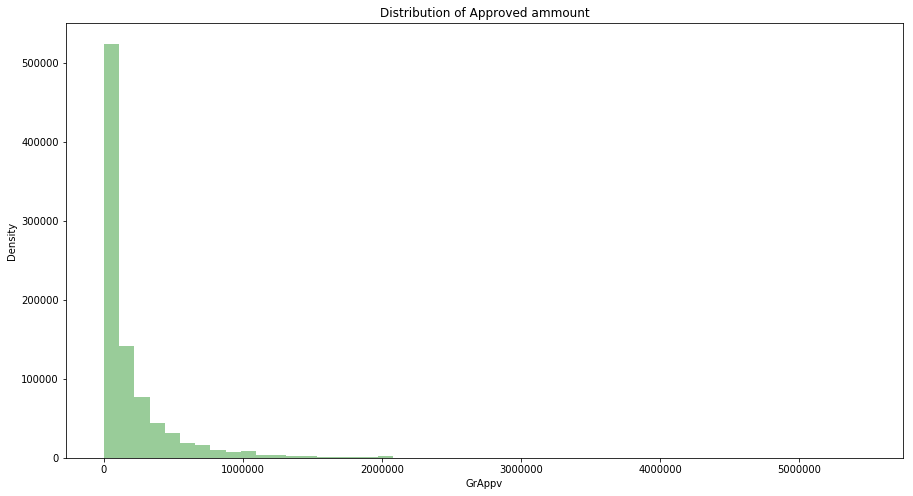

In [79]:
#Distribution of GrAppv. As we can see have skewness.
plt.figure(figsize=(15, 8))
sns.distplot(credit.GrAppv, color="g", kde=False)
plt.ylabel('Density')
plt.title('Distribution of Approved ammount')
plt.show()

/Users/mirbek/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


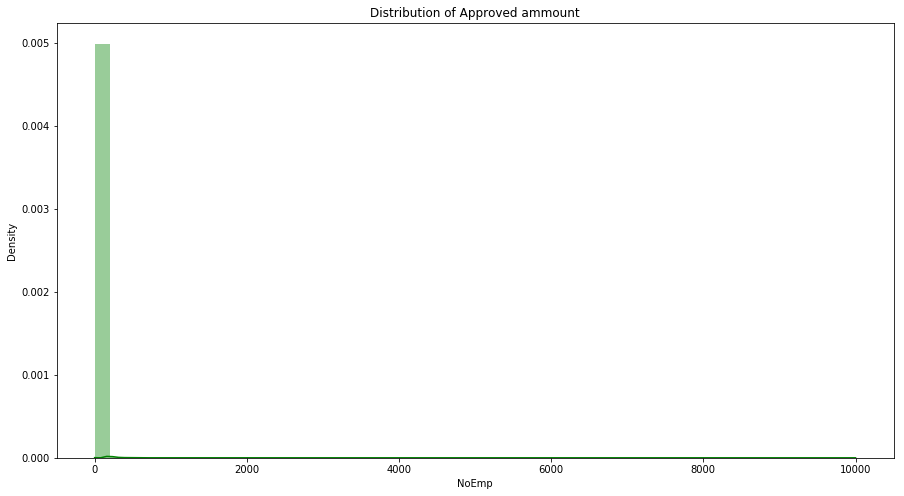

In [80]:
#Distribution of GrAppv. As we can see have skewness.
plt.figure(figsize=(15, 8))
sns.distplot(credit.NoEmp, color="g")
plt.ylabel('Density')
plt.title('Distribution of Approved ammount')
plt.show()

In [83]:
#We finish with data cleaning and feature engeneering. Will save df and start modeling
credit.to_csv('credit_clean.csv', index = False)